In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure

In [111]:
base_table = pd.read_csv('.\data\processed\processed_table.csv')

Subsetting the dataframe for analysis

In [112]:
analysis_df = base_table[base_table['account_year'] < 1997]

# ACCOUNT ANALYSIS

Number of accounts opened based on years and gender

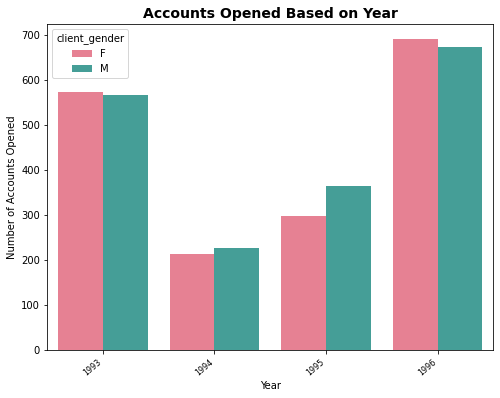

In [113]:
#Number of accounts opened based on years and gender

plt.figure(figsize=(8,6))
ax = sns.countplot(x='account_year', hue ='client_gender', data=analysis_df,palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Accounts Opened Based on Year', fontsize=14, fontweight='bold')
ax.set(xlabel='Year', ylabel='Number of Accounts Opened')
plt.show()

Count of Length of Relationship of Accounts with Gender

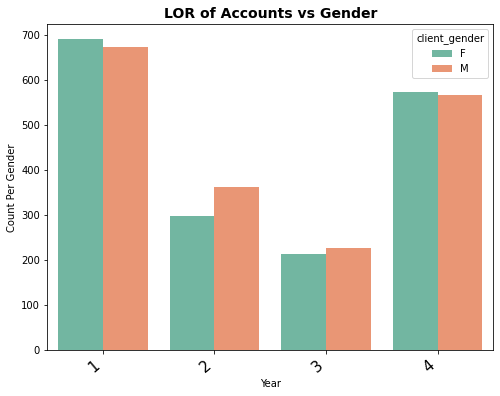

In [114]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='account_lor', hue ='client_gender', data=analysis_df,palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=15)
plt.title('LOR of Accounts vs Gender', fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Count Per Gender")
plt.show()

Accounts Created based on Months

<AxesSubplot:title={'center':'Accounts Created based on Months'}, xlabel='Month', ylabel='Accounts Created'>

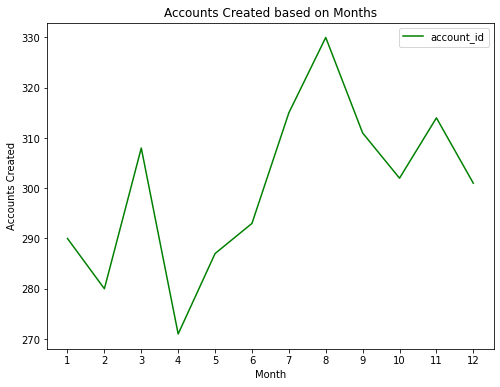

In [115]:
acc_plot1 = pd.DataFrame(analysis_df.groupby('account_month')['account_id'].count())
acc_plot1.plot(xlabel='Month', ylabel='Accounts Created', title='Accounts Created based on Months', figsize=(8,6), color='green', xticks=range(1,13))

Cards Issued Based on Account Length of Relationship

<AxesSubplot:title={'center':'Card Issued Based on Account Length of relationship'}, xlabel='Length of Relationship in Years', ylabel='Cards Issued'>

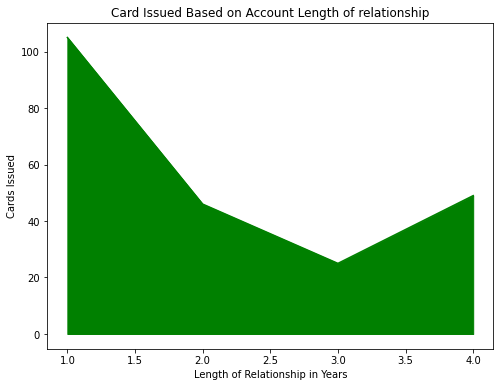

In [116]:
acc_plot2 = analysis_df.groupby('account_lor')['card_issued_97'].sum()
acc_plot2.plot(xlabel='Length of Relationship in Years', ylabel='Cards Issued', title='Card Issued Based on Account Length of relationship', figsize=(8,6), color='green', kind="area")

Loans Granted Based on Account Length of Relationship

<AxesSubplot:title={'center':'Loans granted Based on Account Length of relationship'}, xlabel='Length of Relationship in Years', ylabel='Loan Granted'>

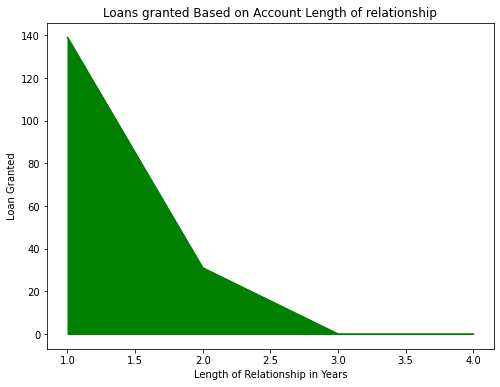

In [117]:
acc_plot3 = analysis_df.groupby('account_lor')['loan_granted'].sum()
acc_plot3.plot(xlabel='Length of Relationship in Years', ylabel='Loan Granted', title='Loans granted Based on Account Length of relationship', figsize=(8,6), color='green', kind="area")

# Client Data

Number of Clients with respect to Age Group And Gender

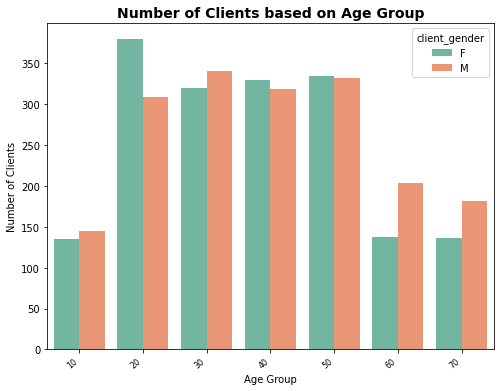

In [118]:
## Plotting histogram with the Age Group and Gender. 
plt.figure(figsize=(8,6))
ax = sns.countplot(x='client_age_group', hue ='client_gender', data=analysis_df,palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.xlabel("Age Group")
plt.ylabel("Number of Clients")
plt.title('Number of Clients based on Age Group', fontsize=14, fontweight='bold')
plt.show()

Number of Clients based on Client Category

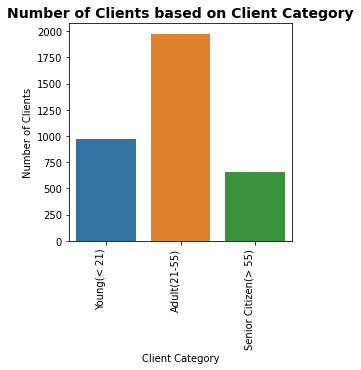

In [119]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='client_category', data=analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
ax.set(xlabel='Client Category',ylabel='Number of Clients')
plt.title('Number of Clients based on Client Category', fontsize=14, fontweight='bold')
plt.show()

Number of Clients based on Client Category and Gender

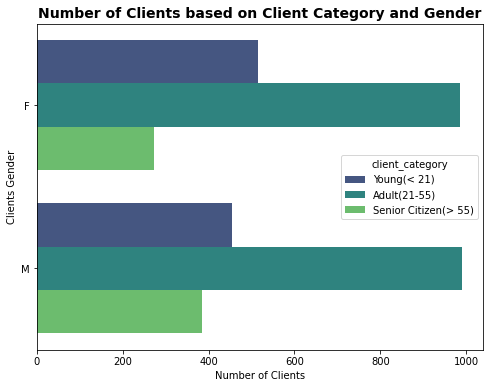

In [120]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y="client_gender", hue="client_category", data=analysis_df,palette="viridis")
plt.title('Number of Clients based on Client Category and Gender', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Clients',ylabel='Clients Gender')
plt.show()


Age Group -  Total Customers / Loans Granted / Cards Issued

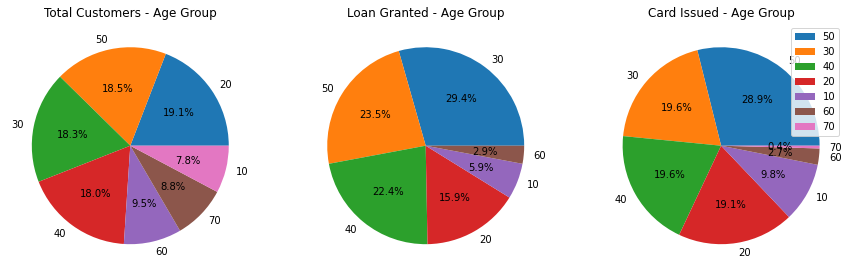

In [121]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

cnt_age_group = analysis_df.loc[:]['client_age_group'].value_counts(normalize=True)
ax[0].pie(cnt_age_group, labels=cnt_age_group.index, autopct='%1.1f%%')
ax[0].set_title("Total Customers - Age Group")

cnt_age_group2 = analysis_df.loc[analysis_df['loan_granted'] == 1]['client_age_group'].value_counts(normalize=True)
ax[1].pie(cnt_age_group2, labels=cnt_age_group2.index, autopct='%1.1f%%')
ax[1].set_title("Loan Granted - Age Group")

cnt_age_group3 = analysis_df.loc[analysis_df['card_issued_97'] == 1]['client_age_group'].value_counts(normalize=True)
ax[2].pie(cnt_age_group3, labels=cnt_age_group3.index, autopct='%1.1f%%')
ax[2].set_title("Card Issued - Age Group")
ax[2].legend()

plt.show()

Client Category vs Loan Granted 

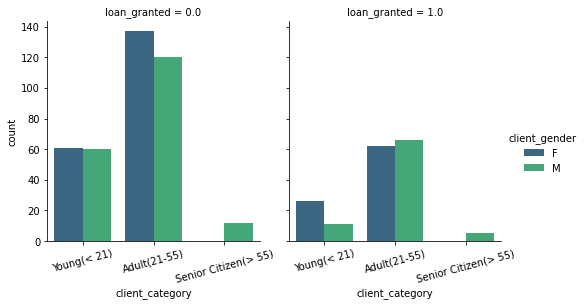

In [122]:
visp = sns.catplot(x="client_category", hue="client_gender", col="loan_granted",
                data=analysis_df, kind="count",
                height=4, aspect=.9,palette="viridis");

visp.set_xticklabels(rotation=15)

Client Category vs Card Issued

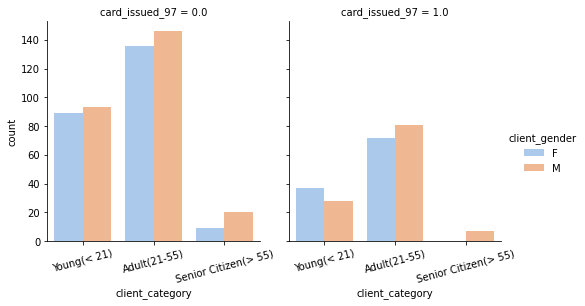

In [123]:
visp1 = sns.catplot(x="client_category", hue="client_gender", col="card_issued_97",
                data=analysis_df, kind="count",
                height=4, aspect=.9,palette = "pastel");
visp1.set_xticklabels(rotation=15)

Loans Granted Based on Average Salary

<AxesSubplot:title={'center':'Loans granted Based on Average Salary'}, xlabel='Average Salary', ylabel='Number of Loans Granted'>

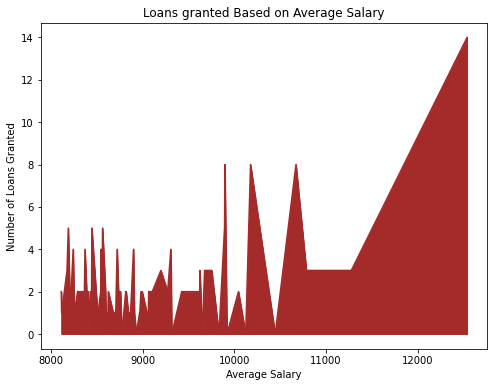

In [77]:
plt_count_card_sal = analysis_df.loc[:].groupby('average_salary')['loan_granted'].sum()
plt_count_card_sal.plot.area(xlabel='Average Salary', ylabel='Number of Loans Granted', title='Loans granted Based on Average Salary', figsize=(8,6), color='brown')

# Clients per District

Distribution of Clients per Region

No handles with labels found to put in legend.


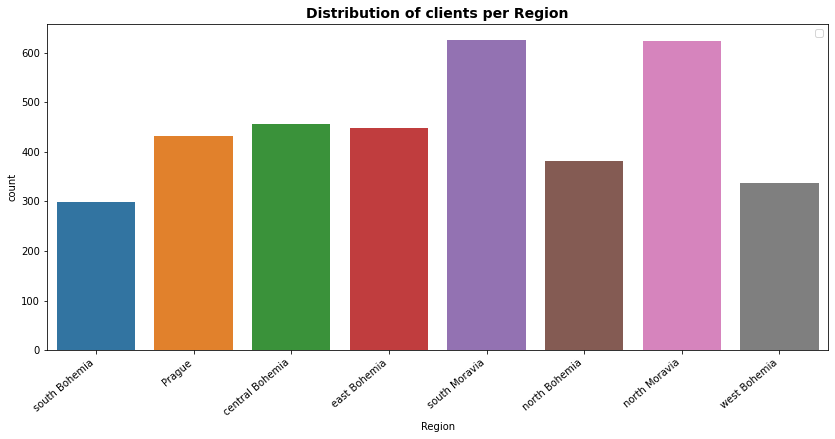

In [78]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Region', data=analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.title('Distribution of clients per Region', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

# Number of clients per district

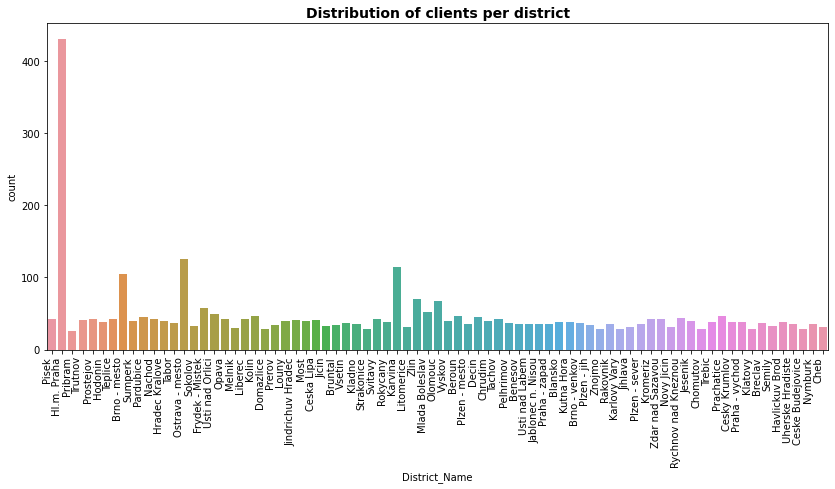

In [79]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='District_Name', data=analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.title('Distribution of clients per district', fontsize=14, fontweight='bold')
plt.show()

# CURRENT LOAN STATUS PER REGION

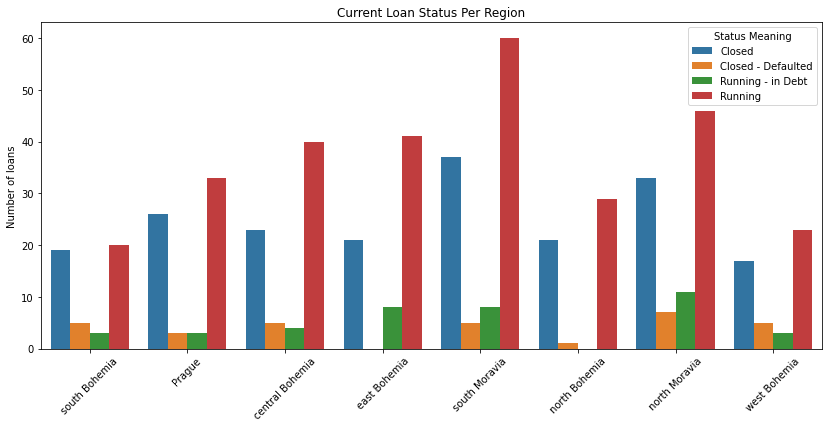

In [80]:

plt.figure(figsize=(14,6))
ax = sns.countplot(x="Region", hue="cur_loan_Status", data=analysis_df)
plt.legend(title="Status Meaning",loc="upper right")
plt.xlabel('')
plt.ylabel('Number of loans')
plt.title('Current Loan Status Per Region')
plt.xticks(rotation = 45)
plt.show()

Loan Amount for the Client Categories

Text(0.5, 1.0, 'Loan Amount for the Client Categories')

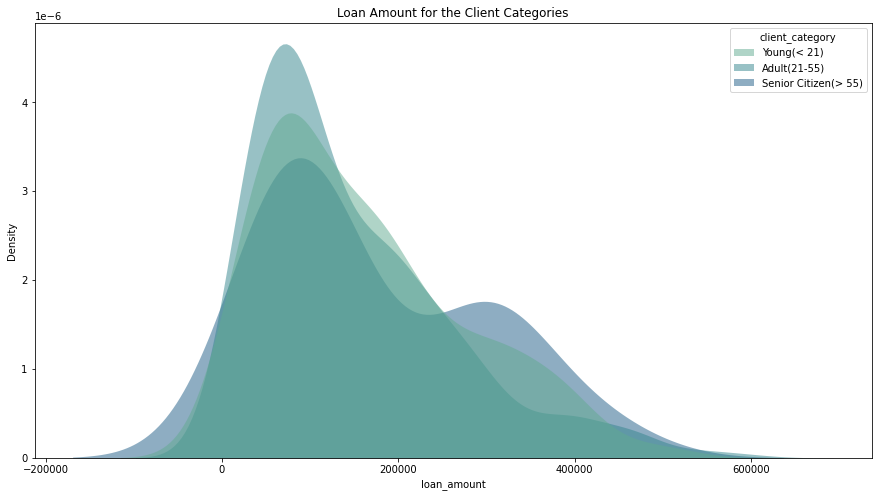

In [81]:
plt.figure(figsize = (15,8))
sns.kdeplot(
   data=analysis_df, x="loan_amount", hue="client_category",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Loan Amount for the Client Categories')

Average balance over cards issued

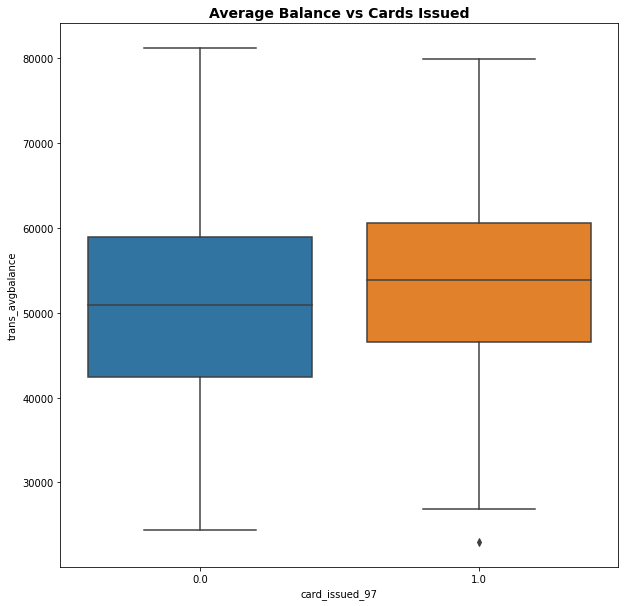

In [82]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='card_issued_97',y='trans_avgbalance', data=analysis_df)
plt.xticks()
ax.set_title('Average Balance vs Cards Issued', fontsize=14, fontweight='bold')

plt.show()

Average balance over loans granted

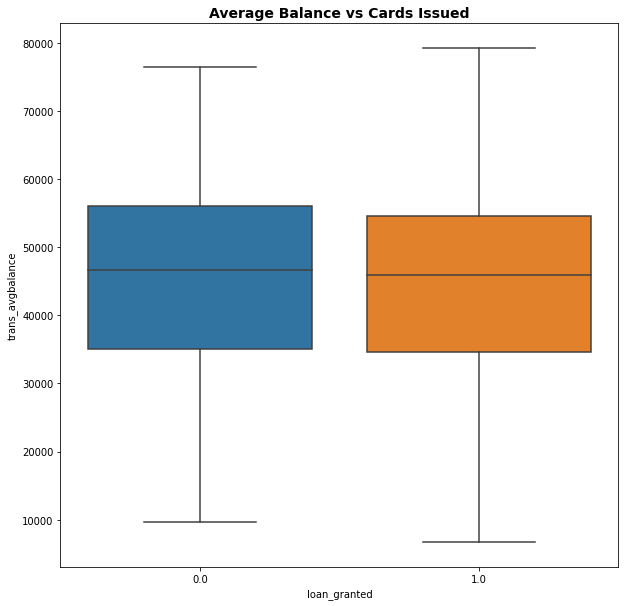

In [83]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='loan_granted',y='trans_avgbalance', data=analysis_df)
plt.xticks()
ax.set_title('Average Balance vs Cards Issued', fontsize=14, fontweight='bold')

plt.show()

Client category vs Gender 

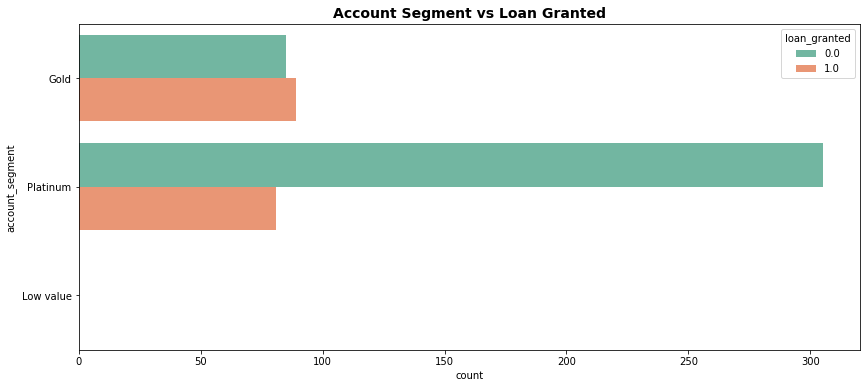

In [84]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y="account_segment", hue="loan_granted", data=analysis_df,palette="Set2")
plt.title('Account Segment vs Loan Granted', fontsize=14, fontweight='bold')
plt.show()

In [85]:
#Taking subset of Loan Granted and not granted

Loan_granted = analysis_df[analysis_df['loan_granted'] == 1]
Loan_notgranted = analysis_df[analysis_df['loan_granted'] != 1]

In [86]:
#Taking subset of Card Issued and not issued

card_issued = analysis_df[analysis_df['card_issued_97'] == 1]
card_notissued = analysis_df[analysis_df['card_issued_97'] != 1]

Average Balance vs Loan Granted

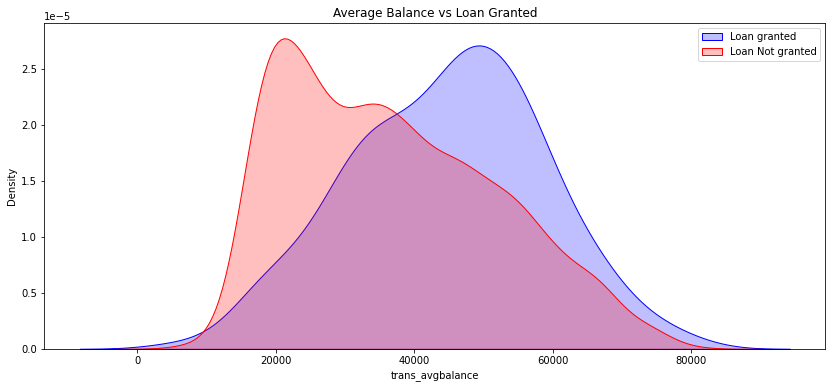

In [87]:
#Loan granted 

plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "b",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('Average Balance vs Loan Granted')
plt.legend()

Average Balance vs Card Issued

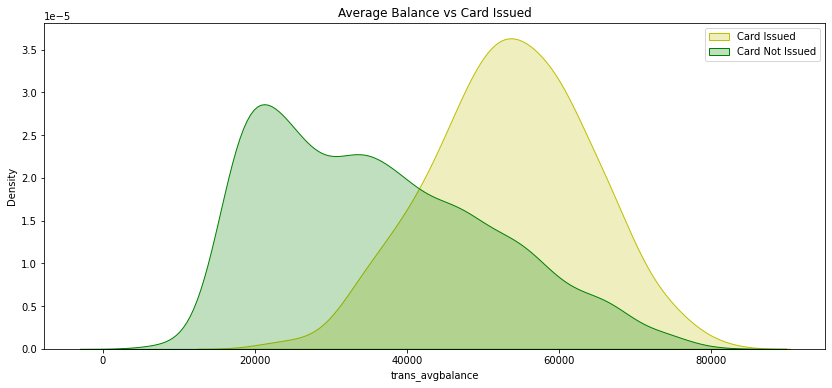

In [88]:
#Card Issued

plt.figure(figsize = (14,6))
sns.kdeplot(card_issued.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "y",label ='Card Issued')
sns.kdeplot(card_notissued.groupby('account_id')['trans_avgbalance'].mean(),shade = True,color = "g",label ='Card Not Issued')
plt.title('Average Balance vs Card Issued')
plt.legend()

Average Transaction Balance for two Groups (Loan granted and Loan not granted)

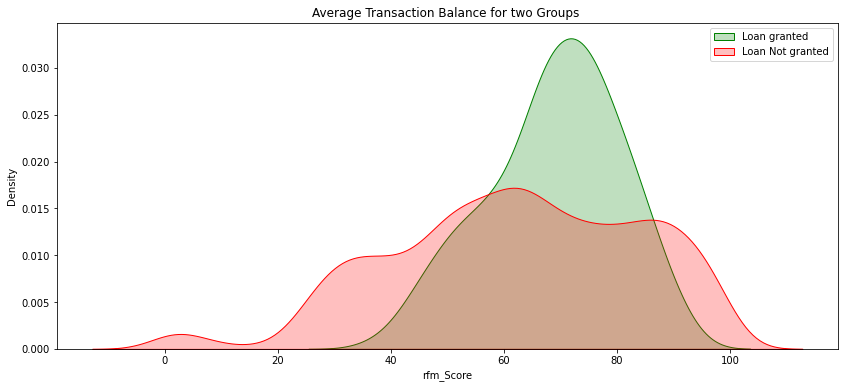

In [89]:
#Loan granted 

plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "g",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('Average Transaction Balance for two Groups ')
plt.legend()

RFM Score for the two Loan Groups(Loan granted and Loan not granted)

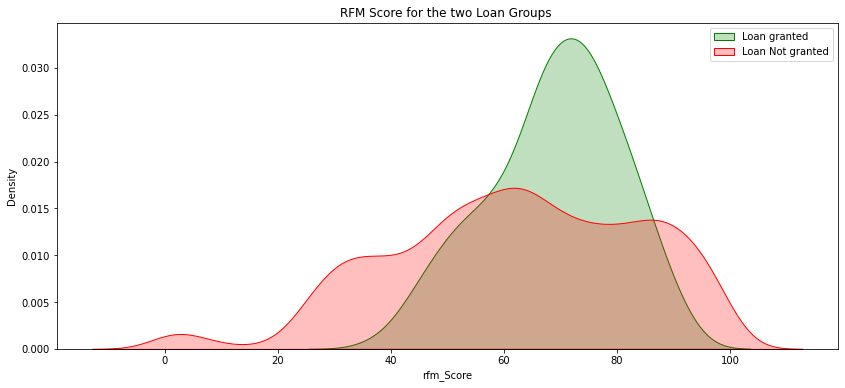

In [90]:
#Loan granted vs RFM Score

plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "g",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('RFM Score for the two Loan Groups ')
plt.legend()

RFM Score for the two Card Groups(Card Issued and Card Not issued)

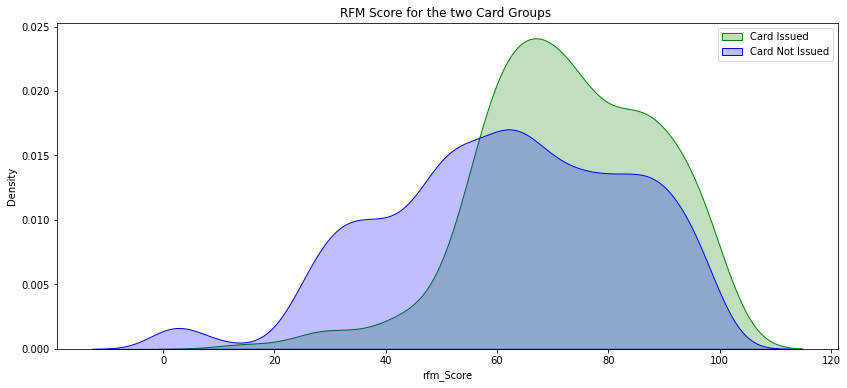

In [91]:
#Card Issued Vs RFM Score 

plt.figure(figsize = (14,6))
sns.kdeplot(card_issued.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "g",label ='Card Issued')
sns.kdeplot(card_notissued.groupby('account_id')['rfm_Score'].mean(),shade = True,color = "b",label ='Card Not Issued')
plt.title('RFM Score for the two Card Groups ')
plt.legend()

Number of credits VS Loan Groups

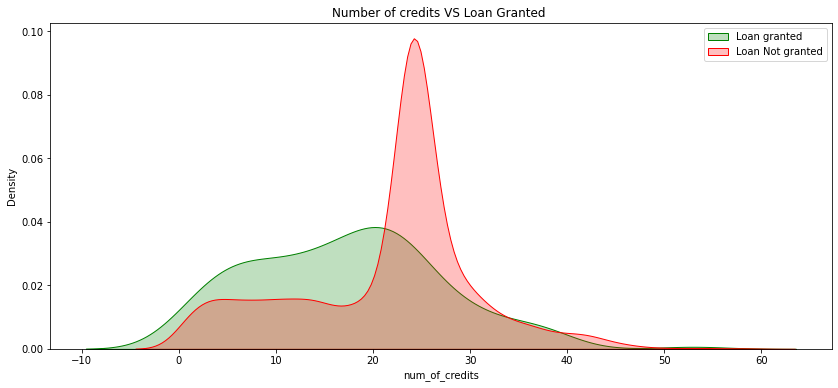

In [92]:
plt.figure(figsize = (14,6))
sns.kdeplot(Loan_granted.groupby('account_id')['num_of_credits'].mean(),shade = True,color = "g",label ='Loan granted')
sns.kdeplot(Loan_notgranted.groupby('account_id')['num_of_credits'].mean(),shade = True,color = "r",label ='Loan Not granted')
plt.title('Number of credits VS Loan Granted ')
plt.legend()

Transaction Types Summary on the share of each transactions -  Credit and Withdrwals 

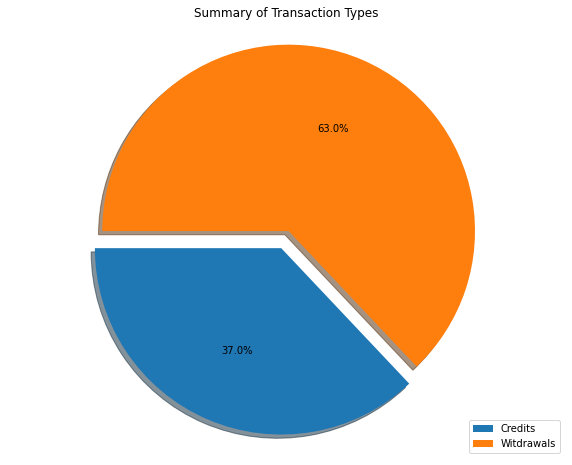

In [94]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8,forward = True)
values = [analysis_df['num_of_credits'].mean(), analysis_df['num_of_withdrawals'].mean()]
ax.set_title('Summary of Transaction Types')
plt.pie(values,autopct ='%1.1f%%',shadow = True,startangle = 180,explode = (0.1,0))
plt.axis("equal")
fig.set_facecolor('white')
plt.legend(labels=('Credits','Witdrawals'))
plt.show()

Average Account Balance

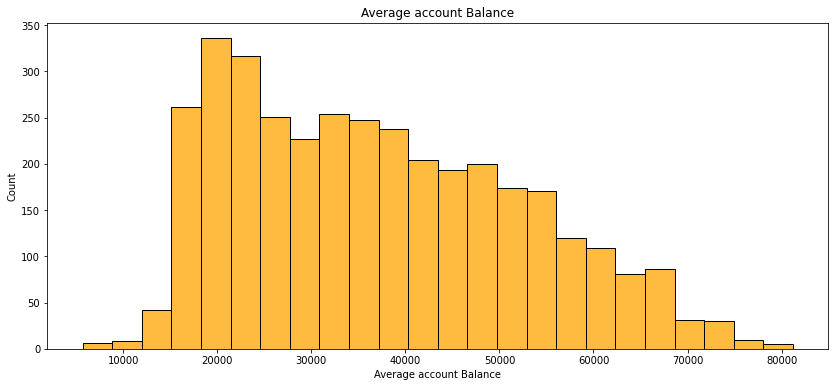

In [95]:
#avgbalance 


fig,ax = plt.subplots()
fig.set_size_inches(14,6,forward =True)
sns.histplot(analysis_df['trans_avgbalance'],color = 'orange')
plt.xlabel('Average account Balance')
ax.set_title('Average account Balance')
plt.show()

Average Transaction Amount

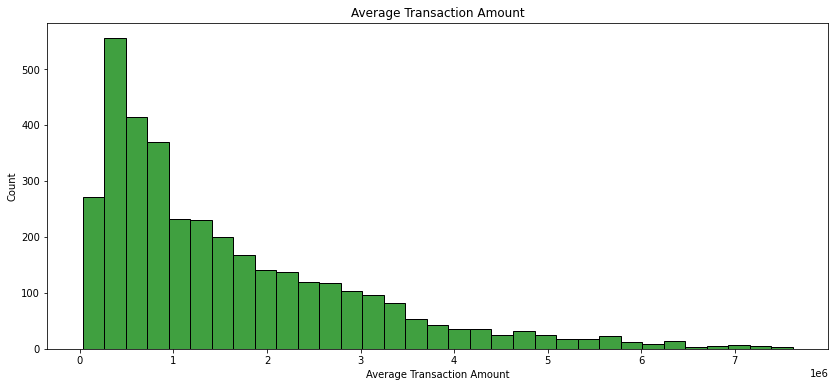

In [96]:
#Average Transaction Amount 


fig,ax = plt.subplots()

fig.set_size_inches(14,6,forward =True)
sns.histplot(analysis_df['total_trans_amount'],color = 'green')
plt.xlabel('Average Transaction Amount')
ax.set_title('Average Transaction Amount')
plt.show()

Average Transaction Balance vs Client gender

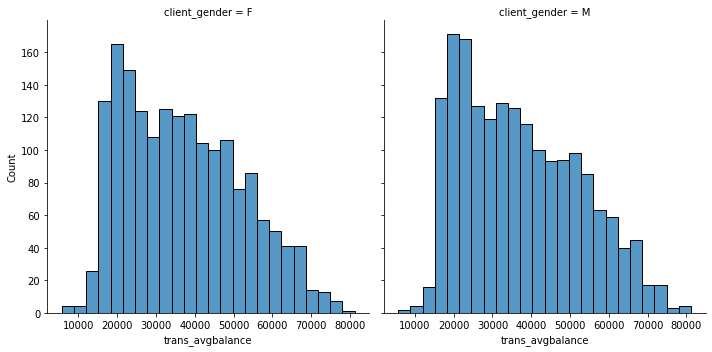

In [97]:
sns.displot(analysis_df, x="trans_avgbalance", col="client_gender")

Account Frequency Vs gender

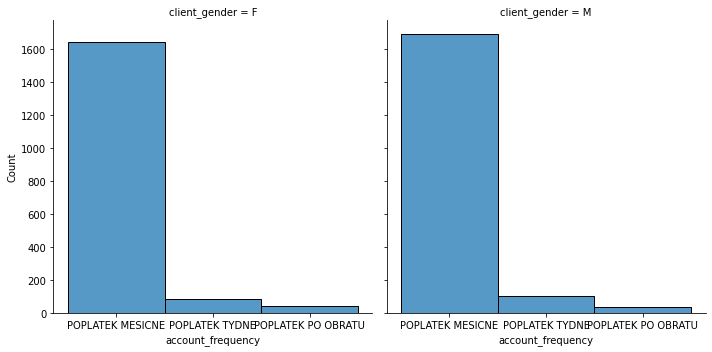

In [98]:
sns.displot(analysis_df, x="account_frequency", col="client_gender")

# DISTRICT 

In [99]:
district_client_card_issued = analysis_df[analysis_df['card_issued_97'] == 1]
district_client_loan_granted = analysis_df[analysis_df['loan_granted'] == 1]


Loan Granted, Card Issued and Total Accounts Per District

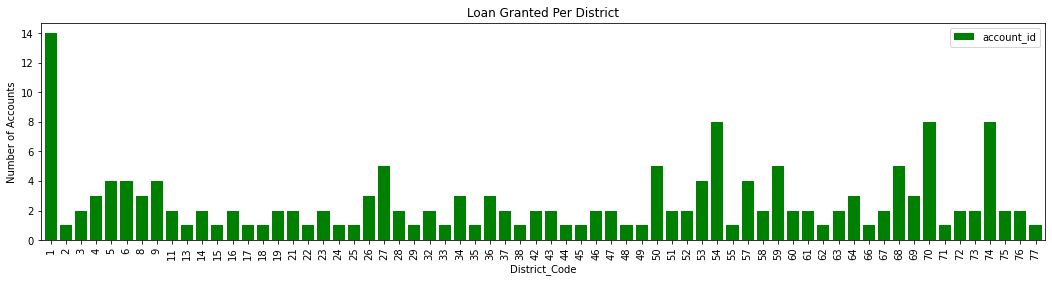

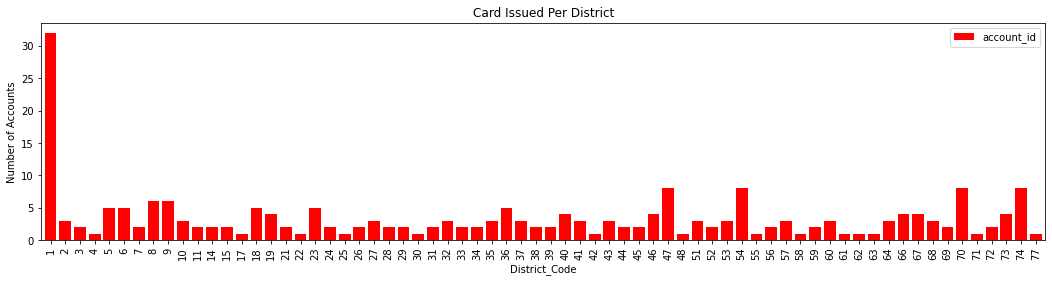

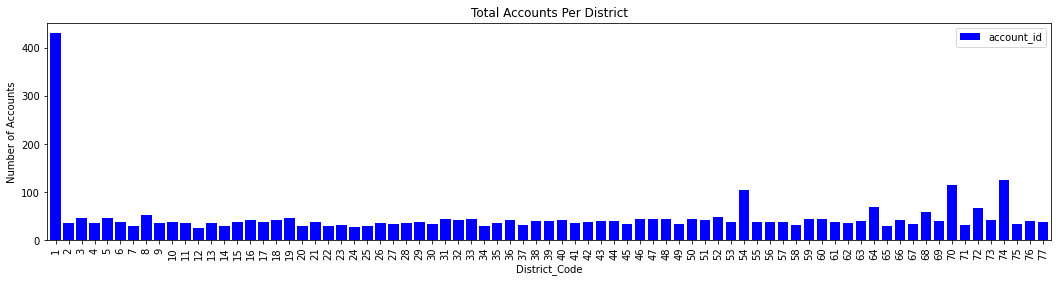

In [100]:
fig, ax = plt.subplots(figsize=(18,4))
ax = district_client_loan_granted.groupby('District_Code')['account_id'].count().plot.bar(color = 'g', 
                                                            width = 0.8, title = 'Loan Granted Per District',grid = False)
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Accounts")
ax.legend()

fig, ax1 = plt.subplots(figsize=(18,4))
ax1 = district_client_card_issued.groupby('District_Code')['account_id'].count().plot.bar(color = 'r',
                                                            width = 0.8, title = 'Card Issued Per District',grid = False)
ax1.set_xlabel("District_Code")
ax1.set_ylabel("Number of Accounts")
ax1.legend()

fig, ax2 = plt.subplots(figsize=(18,4))
ax2 = analysis_df.groupby('District_Code')['account_id'].count().plot.bar(color = 'b',
                                                            width = 0.8, title = 'Total Accounts Per District',grid = False)
ax2.set_xlabel("District_Code")
ax2.set_ylabel("Number of Accounts")
ax2.legend()

Percentage of Loan Issued, Card Issued, Total Accounts Per Region

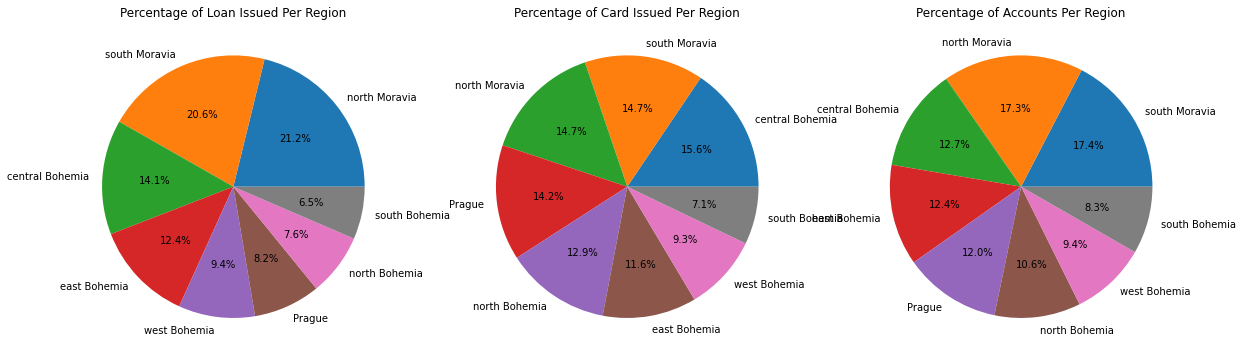

In [101]:
fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['Region'].value_counts()
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per Region')
cnt_incometype = district_client_card_issued['Region'].value_counts()
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per Region')
cnt_incometype = analysis_df['Region'].value_counts()
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per Region')
plt.show()

Average Salary Summary when loan issued and card issued

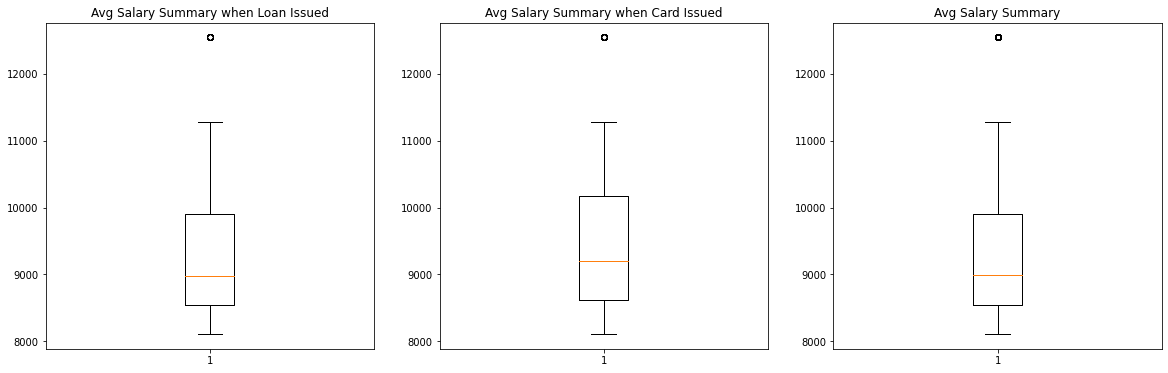

In [102]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['average_salary'])
ax[0].set_title('Avg Salary Summary when Loan Issued')
ax[1].boxplot(district_client_card_issued['average_salary'])
ax[1].set_title('Avg Salary Summary when Card Issued')
ax[2].boxplot(analysis_df['average_salary'])
ax[2].set_title('Avg Salary Summary')
plt.show()

Number of inhabitants Summary when Loan Issued, Cards Issued and Total

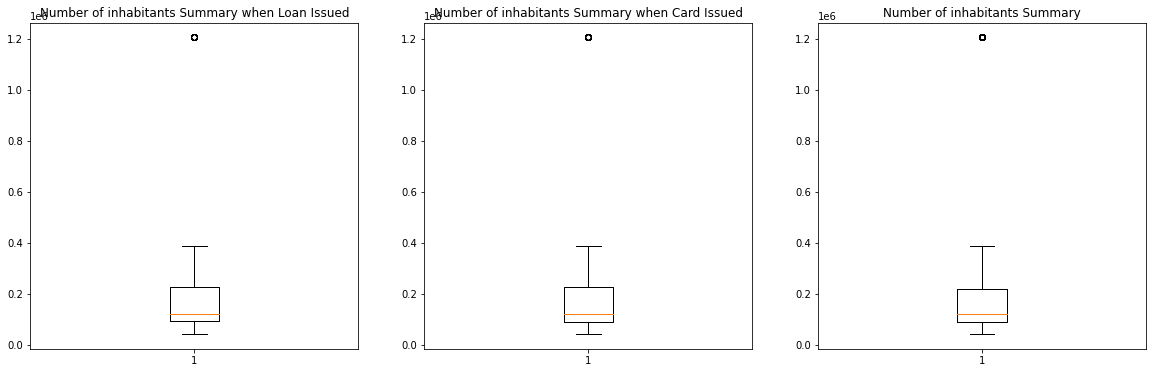

In [103]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['n_inhabitants'])
ax[0].set_title('Number of inhabitants Summary when Loan Issued')
ax[1].boxplot(district_client_card_issued['n_inhabitants'])
ax[1].set_title('Number of inhabitants Summary when Card Issued')
ax[2].boxplot(analysis_df['n_inhabitants'])
ax[2].set_title('Number of inhabitants Summary')
plt.show()

Percentage of Loan Issued,Card Issued and Total Accounts Per cities count

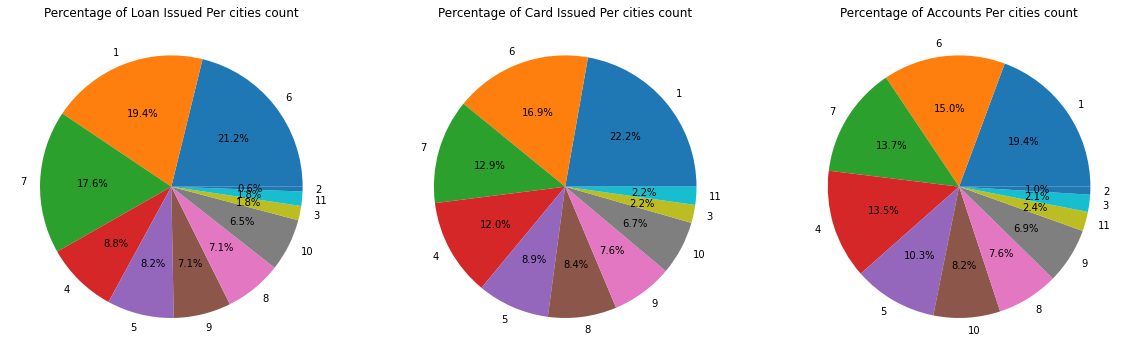

In [104]:
fig, ax = plt.subplots(1, 3,figsize=(20,10))
cnt_incometype = district_client_loan_granted['n_cities'].value_counts(normalize=True)
ax[0].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[0].set_title('Percentage of Loan Issued Per cities count')
cnt_incometype = district_client_card_issued['n_cities'].value_counts(normalize=True)
ax[1].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[1].set_title('Percentage of Card Issued Per cities count')
cnt_incometype = analysis_df['n_cities'].value_counts()
ax[2].pie(cnt_incometype, labels=cnt_incometype.index, autopct='%1.1f%%')
ax[2].set_title('Percentage of Accounts Per cities count')
plt.show()

Loan Issued, Card Issued and toatl Accounts based on municipalities

Text(0, 0.5, 'Number of Accounts')

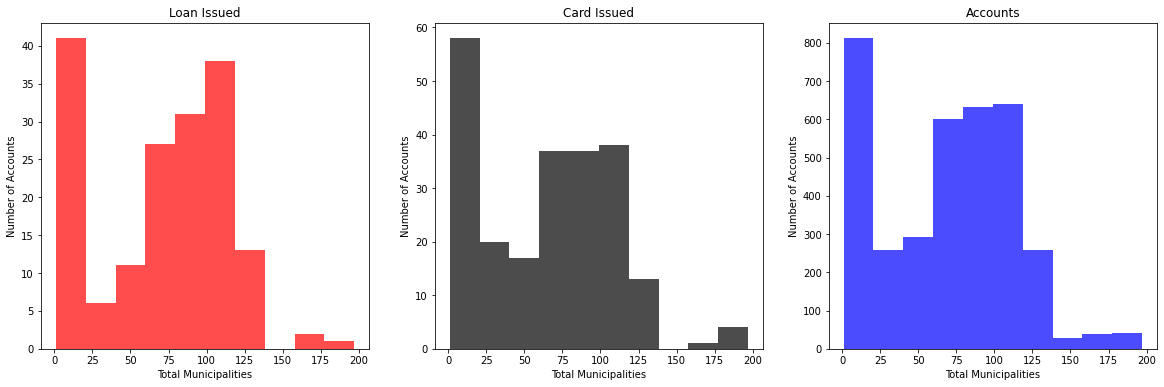

In [105]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].hist(district_client_loan_granted['total_municipalities'], bins=10, color='Red', alpha=0.7, label='total_municipalities')
ax[0].set_title('Loan Issued')  # Title
ax[0].set_xlabel('Total Municipalities')  # X label
ax[0].set_ylabel('Number of Accounts')  # Y label
ax[1].hist(district_client_card_issued['total_municipalities'], bins=10, color='Black', alpha=0.7, label='total_municipalities')
ax[1].set_title('Card Issued')  # Title
ax[1].set_xlabel('Total Municipalities')  # X label
ax[1].set_ylabel('Number of Accounts')  # Y label
ax[2].hist(analysis_df['total_municipalities'], bins=10, color='Blue', alpha=0.7, label='total_municipalities')
ax[2].set_title('Accounts')  # Title
ax[2].set_xlabel('Total Municipalities')  # X label
ax[2].set_ylabel('Number of Accounts')  # Y label

Number of Employed Population when Loan Issued, Card Issued and total

Text(0.5, 1.0, 'Number of Employed Population Summary')

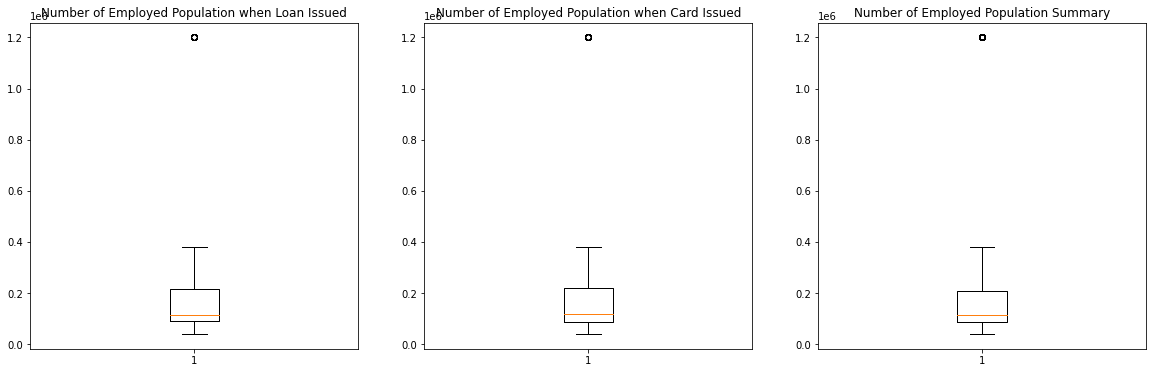

In [106]:
fig, ax = plt.subplots(1, 3,figsize=(20,6))
ax[0].boxplot(district_client_loan_granted['number_of_employed_population_96'])
ax[0].set_title('Number of Employed Population when Loan Issued')
ax[1].boxplot(district_client_card_issued['number_of_employed_population_96'])
ax[1].set_title('Number of Employed Population when Card Issued')
ax[2].boxplot(analysis_df['number_of_employed_population_96'])
ax[2].set_title('Number of Employed Population Summary')

Number of Employed Population vs District

Text(0, 0.5, 'Number of Employed Population')

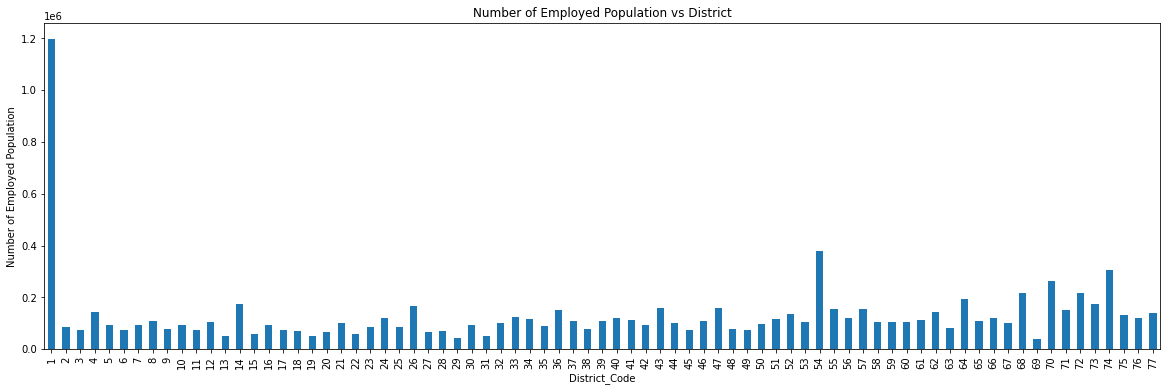

In [107]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Code')['number_of_employed_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Population vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Employed Population")

Number of Employed Urban Population vs District

Text(0, 0.5, 'Number of Employed Urban Population')

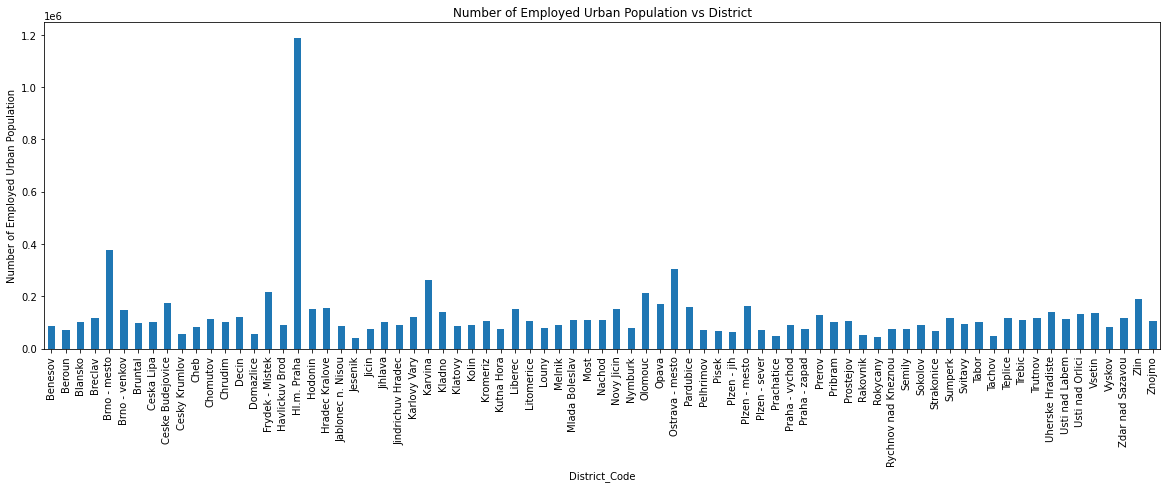

In [108]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Name')['number_of_employed_urban_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Urban Population vs District')
ax.set_xlabel("District_Code")
ax.set_ylabel("Number of Employed Urban Population")

Number of Employed Urban Population vs District

Text(0, 0.5, 'Number of Employed Urban Population')

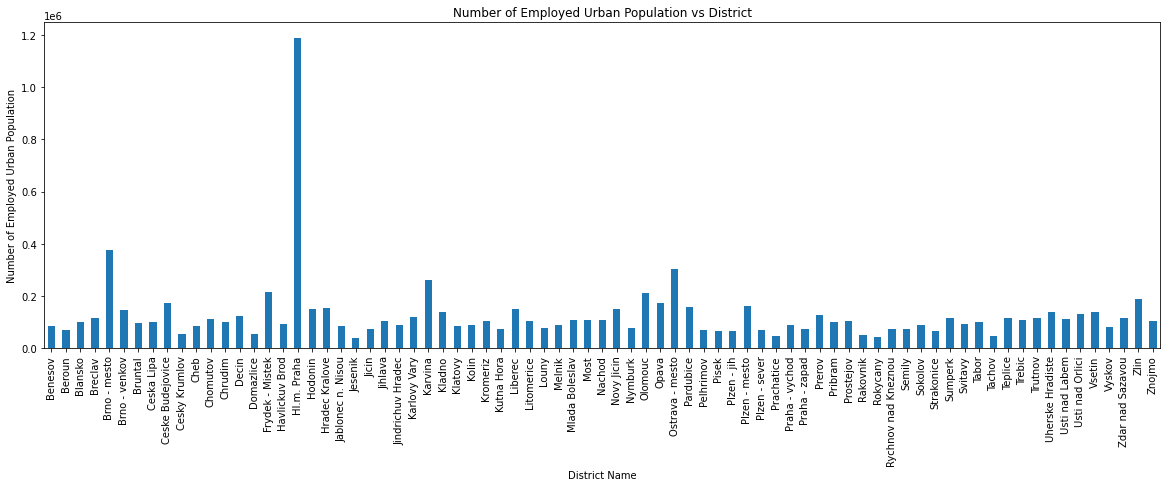

In [109]:
fig, ax = plt.subplots(figsize=(20,6))
ax = analysis_df.groupby('District_Name')['number_of_employed_urban_population_96'].agg('unique').astype(int).plot.bar(title = 'Number of Employed Urban Population vs District')
ax.set_xlabel("District Name")
ax.set_ylabel("Number of Employed Urban Population")